In [6]:
import pandas as pd

from datasets import load_dataset

ds = load_dataset("Jinyan1/PolitiFact")
print(ds)
print(ds.keys())

DatasetDict({
    MF: Dataset({
        features: ['id', 'description', 'text', 'title'],
        num_rows: 97
    })
    HF: Dataset({
        features: ['id', 'description', 'text', 'title'],
        num_rows: 97
    })
    MR: Dataset({
        features: ['id', 'description', 'text', 'title'],
        num_rows: 132
    })
    HR: Dataset({
        features: ['id', 'description', 'text', 'title'],
        num_rows: 194
    })
})
dict_keys(['MF', 'HF', 'MR', 'HR'])


In [8]:
df_mf = ds['MF'].to_pandas()
df_mf['label'] = 'MF'

df_hf = ds['HF'].to_pandas()
df_hf['label'] = 'HF'

df_mr = ds['MR'].to_pandas()
df_mr['label'] = 'MR'

df_hr = ds['HR'].to_pandas()
df_hr['label'] = 'HR'

df_all = pd.concat([df_mf, df_hf, df_hr, df_mr], ignore_index=True)
df_all.head()

,id,description,text,title,label
0,politifact11773,Republican attacks on transgendered Americans ...,inia State Representative Mark Cole's proposed...,Virginia Republican Introduces Controversial B...,MF
1,politifact13827,Whoopi Goldberg is in hot water after comments...,Whoopi Goldberg has found herself in the middl...,Whoopi Goldberg Faces Backlash for Disrespectf...,MF
2,politifact13570,"Washington, DC — A former Secret Service agent...",A former Secret Service agent has written a ne...,Former Secret Service Agent Exposes Shocking S...,MF
3,politifact14947,Bill Clinton’s hitman has confessed to more th...,In what appears to be a major blow to the cred...,Hannity Issues Retraction on False Story: Bill...,MF
4,politifact14517,Scott&#8217;s prognosis isn&#8217;t good. (via...,"In a shocking turn of events, Florida Governor...",Florida Governor Rick Scott Miraculously Recov...,MF


In [11]:
print(df_all.info())
print(df_all['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           520 non-null    object
 1   description  520 non-null    object
 2   text         520 non-null    object
 3   title        520 non-null    object
 4   label        520 non-null    object
dtypes: object(5)
memory usage: 20.4+ KB
None
label
HR    194
MR    132
MF     97
HF     97
Name: count, dtype: int64


In [13]:
print(df_all.isnull().sum())
print(f"Duplicates: {df_all.duplicated().sum()}")

id             0
description    0
text           0
title          0
label          0
dtype: int64
Duplicates: 0


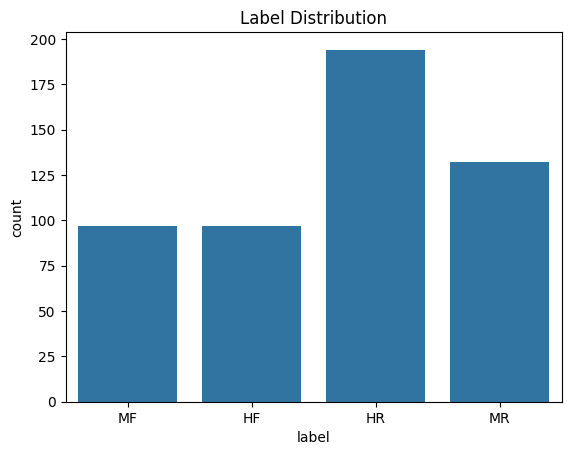

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_all, x='label')
plt.title('Label Distribution')
plt.show()

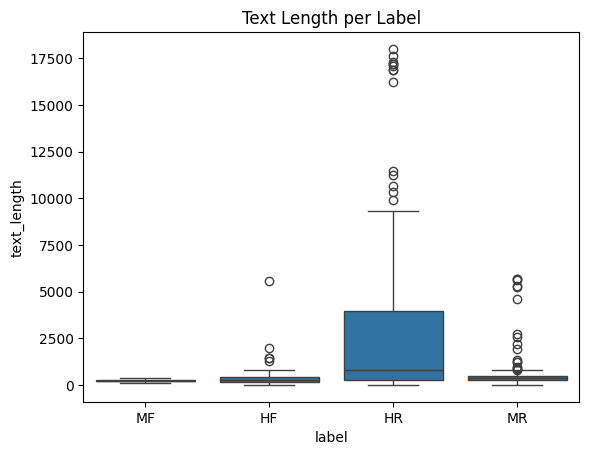

In [17]:
df_all['text_length']=df_all['text'].apply(lambda x: len(x.split()))
sns.boxplot(data=df_all, x='label', y='text_length')
plt.title('Text Length per Label')
plt.show()

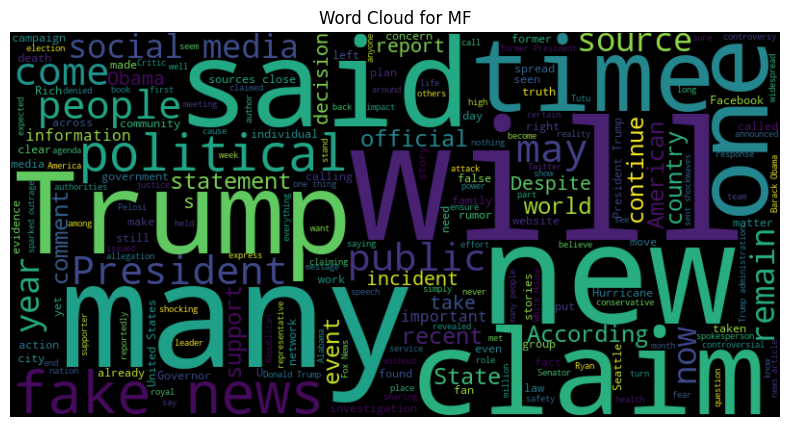

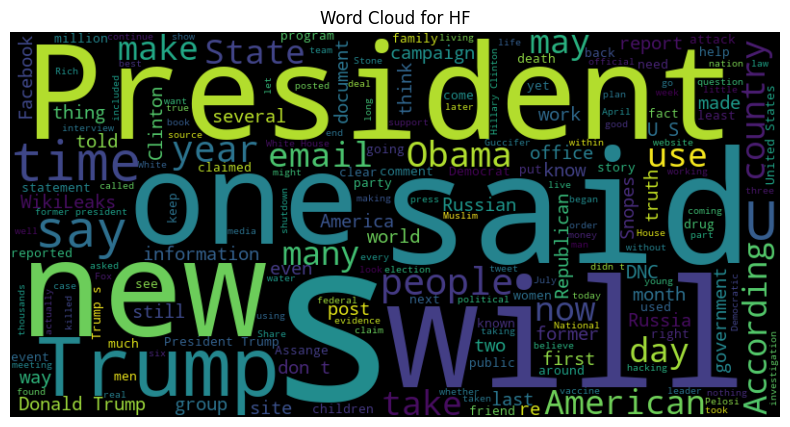

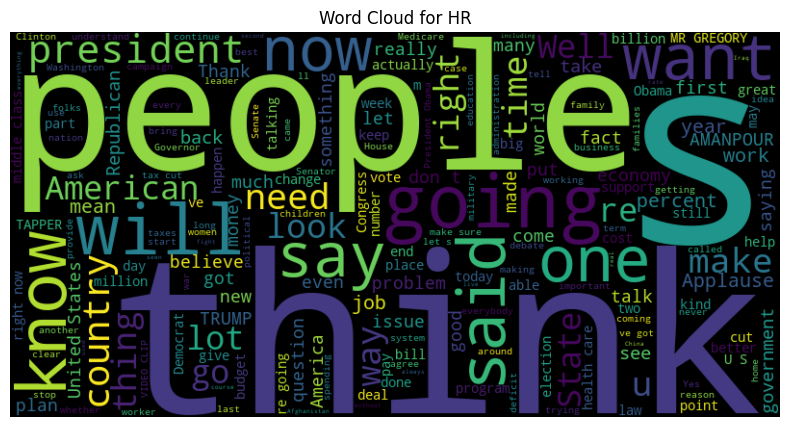

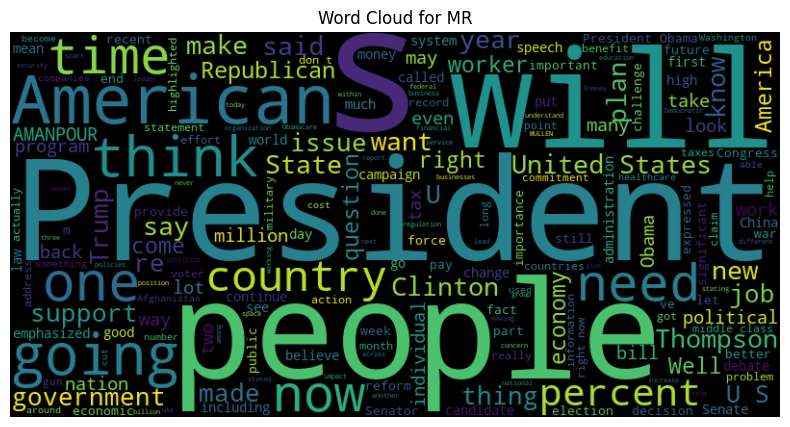

In [18]:
from wordcloud import WordCloud
for label in df_all['label'].unique():
    text = " ".join(df_all[df_all['label'] == label]['text'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label}')
    plt.axis('off')
    plt.show()